In [5]:
# imports for RSA
from numpy import gcd, lcm, mean
from numpy.random import seed, randint
from sympy import factorint

# imports for Shor
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

import time
import matplotlib.pyplot as plt

In [13]:
xx = [15,21,33,35,39,51,55,57,65,69,77,85]

In [20]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

BF_avg_timing = []

for N in xx:

    timings = []
    
    for i in range(0,100,1):
        tic = time.perf_counter()
        prime_factors(N)
        toc = time.perf_counter()
        
        timings.append(toc - tic)

    BF_avg_timing.append(min(timings))

In [3]:
def initialize_qubits(qc, n, m):
    qc.h(range(n)) # apply hadamard gates
    qc.x(n+m-1) # set qubit to 1
    
def measure(qc, n):
    qc.measure(n, n)
    
def apply_iqft(qc, measurement_qubits):
    qc.append(QFT(len(measurement_qubits),
                  do_swaps=False).inverse(),
                  measurement_qubits)
    
def period_finder(n, m, a):
    
    # set up quantum circuit
    qc = QuantumCircuit(n+m, n)
    
    # initialize the qubits
    initialize_qubits(qc, n, m)
    qc.barrier()

    # apply modular exponentiation
    modular_exponentiation(qc, n, m, a)
    qc.barrier()

    # apply inverse QFT
    apply_iqft(qc, range(n))
    qc.barrier()

    # measure the n measurement qubits
    measure(qc, range(n))
    
    return qc

In [6]:
def primitive_roots(p):
    phi = p - 1
    factors = list(factorint(phi).keys())
    roots = []
    for g in range(2, p):
        if all(pow(g, phi // f, p) != 1 for f in factors):
            roots.append(g)
    return roots

# Example with p=97
p = 97
roots = primitive_roots(p)
print(f"Primitive roots of {p} are {roots}")

Primitive roots of 97 are [5, 7, 10, 13, 14, 15, 17, 21, 23, 26, 29, 37, 38, 39, 40, 41, 56, 57, 58, 59, 60, 68, 71, 74, 76, 80, 82, 83, 84, 87, 90, 92]


In [7]:
def a_x_mod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod21(a, x):
    if a not in [2,3,5,7,11,13,17,19]:
        raise ValueError("'a' must be one of 2, 3, 5, 7, 11, 13, 17, or 19")
    U = QuantumCircuit(5)        
    for iteration in range(x):
        if a in [2,19]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
        if a in [3,17]:
            U.swap(3,4)
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [5,13]:
            U.swap(1,4)
            U.swap(0,3)
            U.swap(2,4)
            U.swap(1,3)
        if a in [7,11]:
            U.swap(2,4)
            U.swap(1,3)
            U.swap(0,2)
            U.swap(1,3)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod33(a, x):
    if a not in [2,7,8,11,13,17,19,23,29,31]:
        raise ValueError("'a' must be a primitive root modulo 33")
    U = QuantumCircuit(5)        
    for iteration in range(x):
        if a in [2,31]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
        if a in [7,23]:
            U.swap(3,4)
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 19:
            U.swap(1,4)
            U.swap(0,3)
        if a in [11,17,29]:
            U.swap(2,4)
            U.swap(0,2)
        if a in [7,11,13,17,19,23,29,31]:
            for q in range(5):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod35(a, x):
    if a not in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 32]:
        raise ValueError("'a' must be a primitive root modulo 35")
    U = QuantumCircuit(5)        
    for iteration in range(x):
        if a in [2, 31, 32]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
        if a in [7, 23]:
            U.swap(3,4)
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 19:
            U.swap(1,4)
            U.swap(0,3)
        if a in [11, 17, 29]:
            U.swap(2,4)
            U.swap(0,2)
        if a in [3, 5, 7, 11, 13, 17, 19, 23, 29, 31]:
            for q in range(5):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod39(a, x):
    if a not in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]:
        raise ValueError("'a' must be a primitive root modulo 39")
    U = QuantumCircuit(5)        
    for iteration in range(x):
        if a in [2, 37]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
        if a in [7, 23]:
            U.swap(3,4)
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 19:
            U.swap(1,4)
            U.swap(0,3)
        if a in [11, 17, 29]:
            U.swap(2,4)
            U.swap(0,2)
        if a in [3, 5, 11, 13, 17, 19, 29, 31]:
            for q in range(5):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod51(a, x):
    if a not in [7, 19, 31, 37, 43, 47]:
        raise ValueError("'a' must be a primitive root modulo 51")
    U = QuantumCircuit(6)        
    for iteration in range(x):
        if a == 7:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
        if a == 19:
            U.swap(1,4)
            U.swap(0,3)
        if a == 31:
            U.swap(2,5)
            U.swap(1,4)
            U.swap(0,3)
        if a == 37:
            U.swap(3,5)
            U.swap(2,4)
            U.swap(1,3)
            U.swap(0,2)
        if a == 43:
            U.swap(1,5)
            U.swap(0,4)
            U.swap(2,3)
        if a == 47:
            U.swap(0,5)
            U.swap(1,4)
            U.swap(2,3)
        for q in range(6):
            U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator

def a_x_mod55(a, x):
    if a not in [2, 6, 8, 13, 14, 19, 24, 26, 29, 31, 32, 33, 34, 37, 38, 41, 43, 44, 46, 47, 52, 53]:
        raise ValueError("'a' must be a primitive root modulo 55")
    U = QuantumCircuit(6) 
    for i in range(x):
        if a in [2, 13, 24, 38, 49]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
        if a in [6, 19, 31, 43]:
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
        if a in [8, 32]:
            U.swap(2,4)
            U.swap(3,5)
            U.swap(1,3)
        if a in [14, 47]:
            U.swap(1,4)
            U.swap(0,3)
        if a in [26, 44]:
            U.swap(2,5)
            U.swap(1,4)
            U.swap(0,3)
        if a in [29, 52]:
            U.swap(1,5)
            U.swap(0,4)
        if a in [33, 46]:
            U.swap(0,2)
            U.swap(2,4)
            U.swap(1,3)
            U.swap(3,5)
        if a == 41:
            U.swap(0,5)
            U.swap(1,4)
            U.swap(2,3)
        if a == 37:
            for q in range(6):
                U.x(q)
    #U = Operator(U)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod57(a, x):
    if a not in [3, 5, 6, 17, 19, 20, 21, 22, 23, 24, 30, 33, 34, 35, 36, 39, 41, 45, 46, 48]:
        raise ValueError("'a' must be a primitive root modulo 57")
    U = QuantumCircuit(6) 
    for i in range(x):
        if a in [3, 20, 21, 36, 45]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
        if a in [5, 17, 23, 33, 39]:
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
        if a in [6, 48]:
            U.swap(2,4)
            U.swap(3,5)
            U.swap(1,3)
        if a in [19, 46]:
            U.swap(1,4)
            U.swap(0,3)
        if a in [24, 41]:
            U.swap(2,5)
            U.swap(1,4)
            U.swap(0,3)
        if a in [30, 48]:
            U.swap(1,5)
            U.swap(0,4)
        if a in [34, 46]:
            U.swap(0,2)
            U.swap(2,4)
            U.swap(1,3)
            U.swap(3,5)
        if a == 22:
            U.swap(0,5)
            U.swap(1,4)
            U.swap(2,3)
        if a == 39:
            for q in range(6):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod65(a, x):
    if a not in [2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63]:
        raise ValueError("'a' must be a primitive root modulo 65")
    U = QuantumCircuit(7) 
    for i in range(x):
        if a in [2, 3, 8, 32]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(5,6)
        if a in [4, 16, 23, 36, 39, 46, 54]:
            U.swap(1,3)
            U.swap(2,4)
            U.swap(4,6)
        if a in [5, 20, 29, 31, 45, 56]:
            U.swap(1,4)
            U.swap(0,3)
            U.swap(2,5)
        if a in [7, 28, 30, 44, 59]:
            U.swap(1,5)
            U.swap(2,6)
            U.swap(0,4)
        if a in [9, 13, 18, 24, 42, 48, 53, 58]:
            U.swap(2,5)
            U.swap(3,6)
        if a in [10, 19, 22, 34, 47, 52, 61, 62]:
            U.swap(0,5)
            U.swap(1,6)
        if a in [11, 21, 35, 40, 49, 50, 55, 64]:
            U.swap(0,6)
            U.swap(2,5)
            U.swap(3,4)
        if a in [12, 17, 37, 43, 51, 57, 60, 63]:
            U.swap(0,2)
            U.swap(4,6)
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
        if a in [14, 41]:
            for q in range(7):
                U.x(q)
        if a in [15, 25]:
            for q in range(7):
                U.swap(q, 6-q)
    #U = Operator(U)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod69(a, x):
    if a not in [2, 3, 5, 6, 7, 10, 11, 14, 15, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 41, 43, 44, 45, 46, 47, 51, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68]:
        raise ValueError("'a' must be a primitive root modulo 69")
    U = QuantumCircuit(7)
    for i in range(x):
        if a in [2, 22, 23, 41, 43, 44, 48, 51, 52, 58, 59, 61, 64, 68]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(5,6)
        if a in [3, 11, 24, 27, 28, 29, 30, 33, 34, 35, 37, 39, 42, 45, 46, 47, 56, 57, 60, 62, 63, 65, 66, 67]:
            U.swap(0,3)
            U.swap(1,4)
            U.swap(2,5)
            U.swap(3,6)
        if a in [5, 10, 15, 17, 20, 21, 26, 31, 38, 40, 49, 53, 54, 55]:
            U.swap(1,5)
            U.swap(2,4)
        if a in [6, 14, 19, 36, 50]:
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
        if a in [7, 30, 32, 52]:
            U.swap(0,2)
            U.swap(2,4)
            U.swap(4,6)
        if a in [17, 28, 31, 47, 53]:
            U.swap(1,6)
            U.swap(0,5)
        if a in [21, 27, 46, 57]:
            U.swap(0,4)
            U.swap(2,6)
        if a in [24, 42, 60]:
            U.swap(0,3)
            U.swap(3,6)
        if a in [38, 49, 66]:
            U.swap(1,4)
            U.swap(4,6)
        if a == 11:
            for q in range(7):
                U.x(q)
        if a == 52:
            U.swap(0,6)
            U.swap(1,5)
            U.swap(2,4)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod77(a, x):
    if a not in [3, 5, 6, 7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71]:
        raise ValueError("'a' must be a primitive root modulo 77")
    U = QuantumCircuit(8)
    for i in range(x):
        if a in [3, 7, 20, 23, 24, 27, 29, 30, 31, 34, 35, 36, 38, 39, 44, 46, 47, 48, 49, 50, 53, 54, 55, 57, 58, 59, 61, 62, 63, 65, 66, 68, 69, 70, 71]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(5,6)
            U.swap(6,7)
        if a in [5, 13, 18, 21, 26, 32, 33, 40, 41, 45, 51, 56, 60]:
            U.swap(1,4)
            U.swap(2,3)
            U.swap(5,7)
        if a in [6, 17, 19, 28, 37, 42, 43, 52, 67]:
            U.swap(1,3)
            U.swap(2,6)
            U.swap(4,5)
        if a in [10, 12, 15, 16, 22, 25, 58]:
            U.swap(1,5)
            U.swap(2,4)
            U.swap(3,7)
        if a in [11, 48]:
            for q in range(8):
                U.x(q)
        if a == 50:
            U.swap(0,7)
            U.swap(1,6)
            U.swap(2,5)
            U.swap(3,4)
        if a == 64:
            U.swap(0,4)
            U.swap(1,5)
            U.swap(2,6)
            U.swap(3,7)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod85(a, x):
    if a not in [3, 11, 13, 17, 22, 27, 28, 33, 34, 36, 39, 44, 46, 47, 48, 52, 53, 54, 57, 58, 59, 61, 62, 63, 66, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 82, 83]:
        raise ValueError("'a' must be a primitive root modulo 85")
    U = QuantumCircuit(8)
    for i in range(x):
        if a in [3, 11, 13, 17, 22, 27, 34, 36, 39, 44, 46, 47, 48, 53, 54, 57, 59, 62, 63, 66, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 83]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(5,6)
            U.swap(6,7)
        if a in [28, 33, 52, 58, 61]:
            U.swap(1,4)
            U.swap(2,3)
            U.swap(5,7)
        if a in [44, 77]:
            U.swap(1,3)
            U.swap(2,6)
            U.swap(4,5)
        if a in [46, 48, 78, 82]:
            U.swap(1,5)
            U.swap(2,4)
            U.swap(3,7)
        if a == 27:
            for q in range(8):
                U.x(q)
        if a == 73:
            U.swap(0,7)
            U.swap(1,6)
            U.swap(2,5)
            U.swap(3,4)
        if a == 59:
            U.swap(0,4)
            U.swap(1,5)
            U.swap(2,6)
            U.swap(3,7)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod91(a, x):
    if a not in [8, 19, 29, 31, 37, 41, 43, 46, 47, 51, 53, 58, 59, 61, 62, 64, 65, 67, 68, 69, 71, 73, 74, 79, 82, 83, 84, 85]:
        raise ValueError("'a' must be a primitive root modulo 91")
    U = QuantumCircuit(9)
    for i in range(x):
        if a in [8, 19, 31, 43, 46, 47, 51, 53, 62, 64, 65, 67, 68, 69, 71, 74, 79, 82, 83, 85]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(5,6)
            U.swap(6,7)
            U.swap(7,8)
        if a in [37, 41, 59, 61]:
            U.swap(1,3)
            U.swap(2,6)
            U.swap(4,5)
            U.swap(7,8)
        if a == 29:
            U.swap(0,8)
            U.swap(1,7)
            U.swap(2,6)
            U.swap(3,5)
        if a == 53:
            U.swap(0,7)
            U.swap(1,6)
            U.swap(2,5)
            U.swap(3,4)
            U.swap(4,8)
        if a == 74:
            U.swap(0,8)
            U.swap(1,7)
            U.swap(2,6)
            U.swap(3,5)
            U.swap(4,7)
            U.swap(5,6)
            U.swap(6,8)
        if a == 83:
            for q in range(9):
                U.x(q)
        if a == 59:
            U.swap(0,4)
            U.swap(1,5)
            U.swap(2,6)
            U.swap(3,7)
            U.swap(4,8)
        if a == 31:
            U.swap(0,6)
            U.swap(1,7)
            U.swap(2,8)
            U.swap(3,5)
            U.swap(4,6)
        if a == 71:
            U.swap(0,8)
            U.swap(1,7)
            U.swap(2,6)
            U.swap(3,5)
            U.swap(4,8)
            U.swap(5,7)
            U.swap(6,8)
        if a == 68:
            U.swap(0,8)
            U.swap(1,7)
            U.swap(2,6)
            U.swap(3,5)
            U.swap(4,8)
            U.swap(5,7)
            U.swap(6,8)
            U.swap(7,8)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

def a_x_mod93(a, x):
    if a not in [5, 7, 11, 13, 14, 15, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 41, 43, 44, 46, 47, 49, 50, 52, 53, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92]:
        raise ValueError("'a' must be a primitive root modulo 93")
    U = QuantumCircuit(8)
    for i in range(x):
        if a in [5, 11, 19, 20, 22, 23, 25, 26, 28, 29, 35, 37, 43, 44, 46, 47, 49, 50, 52, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 77, 79, 80, 82, 83, 85, 86, 88, 89]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(5,6)
            U.swap(6,7)
        if a == 13:
            U.swap(0,3)
            U.swap(1,6)
            U.swap(2,5)
            U.swap(4,7)
        if a == 14:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(4,6)
            U.swap(5,7)
        if a == 15:
            U.swap(0,4)
            U.swap(1,5)
            U.swap(2,6)
            U.swap(3,7)
        if a == 17:
            U.swap(0,5)
            U.swap(1,4)
            U.swap(2,7)
            U.swap(3,6)
        if a == 32:
            U.swap(1,3)
            U.swap(2,5)
            U.swap(4,6)
        if a == 38:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(4,7)
            U.swap(5,6)
        if a == 41:
            U.swap(0,6)
            U.swap(1,5)
            U.swap(2,4)
            U.swap(3,7)
        if a == 52:
            U.swap(1,2)
            U.swap(3,6)
            U.swap(4,5)
        if a == 53:
            U.swap(0,3)
            U.swap(1,4)
            U.swap(2,5)
            U.swap(6,7)        
        if a == 73:
            U.swap(0,7)
            U.swap(1,6)
            U.swap(2,5)
            U.swap(3,4)
        if a == 59:
            U.swap(0,4)
            U.swap(1,5)
            U.swap(2,6)
            U.swap(3,7)
        if a == 74:
            U.swap(0,6)
            U.swap(1,3)
            U.swap(2,5)
            U.swap(4,7)
        if a == 76:
            U.swap(0,5)
            U.swap(1,6)
            U.swap(2,3)
            U.swap(4,7)
        if a == 77:
            U.swap(1,3)
            U.swap(2,6)
            U.swap(4,5)
        if a == 79:
            U.swap(0,6)
            U.swap(1,5)
            U.swap(2,4)
            U.swap(3,7)
        if a == 82:
            U.swap(0,4)
            U.swap(1,3)
            U.swap(2,5)
            U.swap(6,7)
        if a == 83:
            U.swap(0,3)
            U.swap(1,4)
            U.swap(2,5)
            U.swap(6,7)
        U = U.to_gate()
        U.name = f"U({x})"
        c_U = U.control()
        return c_U



def modular_exponentiation(qc, n, m, a):
    for x in range(n):
        exponent = 2**x
        
        if N == 15:
            qc.append(a_x_mod15(a, exponent), [x] + list(range(n, n+m)))
        elif N == 21:
            qc.append(a_x_mod21(a, exponent), [x] + list(range(n, n+m)))
        elif N == 33:
            qc.append(a_x_mod33(a, exponent), [x] + list(range(n, n+m)))
        elif N == 35:
            qc.append(a_x_mod35(a, exponent), [x] + list(range(n, n+m)))
        elif N == 39:
            qc.append(a_x_mod39(a, exponent), [x] + list(range(n, n+m)))
        elif N == 51:
            qc.append(a_x_mod51(a, exponent), [x] + list(range(n, n+m)))
        elif N == 55:
            qc.append(a_x_mod55(a, exponent), [x] + list(range(n, n+m)))
        elif N == 57:
            qc.append(a_x_mod57(a, exponent), [x] + list(range(n, n+m)))
        elif N == 65:
            qc.append(a_x_mod65(a, exponent), [x] + list(range(n, n+m)))
        elif N == 69:
            qc.append(a_x_mod69(a, exponent), [x] + list(range(n, n+m)))
        elif N == 77:
            qc.append(a_x_mod77(a, exponent), [x] + list(range(n, n+m)))
        elif N == 85:
            qc.append(a_x_mod85(a, exponent), [x] + list(range(n, n+m)))
        elif N == 91:
            qc.append(a_x_mod91(a, exponent), [x] + list(range(n, n+m)))
        elif N == 93:
            qc.append(a_x_mod93(a, exponent), [x] + list(range(n, n+m)))
        elif N == 95:
            qc.append(a_x_mod95(a, exponent), [x] + list(range(n, n+m)))
        elif N == 111:
            qc.append(a_x_mod111(a, exponent), [x] + list(range(n, n+m)))
        elif N == 115:
            qc.append(a_x_mod115(a, exponent), [x] + list(range(n, n+m)))
        
            

In [11]:
QC = []

for N,a in ((15,7),(21,2),(33,2),(35,7),(39,2),(51,7),(55,13),(57,3),(65,3),
            (69,3),(77,3),(85,3)):
    if N == 15:
        QC.append((period_finder(4, 4, a), N, a))
    elif N>=91:
        QC.append((period_finder(9, 9, a), N, a))
    elif N>=77:
        QC.append((period_finder(8, 8, a), N, a))
    elif N>=65:
        QC.append((period_finder(7, 7, a), N, a))
    elif N>=51:
        QC.append((period_finder(6, 6, a), N, a))
    else:
        QC.append((period_finder(5, 5, a), N, a))

#qc.draw(output='mpl')
#,(91,19),(93,5),(95,2),(111,2),(115,2)

In [21]:
simulator = Aer.get_backend('qasm_simulator')

Shor_avg_timing = []

for qc,N,a in QC:
    
    timings = []
    
    for i in range(0,1,1):
        tic = time.perf_counter()
        
        counts = execute(qc, backend=simulator).result().get_counts(qc)
        
        # convert and add binary periods to list
        counts_dec = sorted([int(measured_value[::-1], 2) for measured_value in counts])
        #print("Measured periods:", end='\t')
            
        for measured_value in counts_dec:
            pass
            #print(measured_value, end='\t')
            
        factors = set()

        for x in counts_dec:
            guesses = [gcd(int((a ** (measured_value/2))) + 1, N),
                       gcd(int((a ** (measured_value/2))) - 1, N)]
            for guess in guesses:
                # ignore trivial factors
                if guess != 1 and guess != N and N % guess == 0:
                    factors.add(guess)

        if len(factors):
            P = factors.pop()
            Q = factors.pop() if len(factors) else N // P
            #print(f"P = {P}\nQ = {Q}\n\n", f"{P} x {Q} = {N}, {P * Q == N}")
        else:
            pass
            #print("Shor's Algorithm Failed. Choose a different 'a'.")
                
        toc = time.perf_counter()
        
        timings.append(toc - tic)
    
    Shor_avg_timing.append(min(timings))

#plot_histogram(counts)

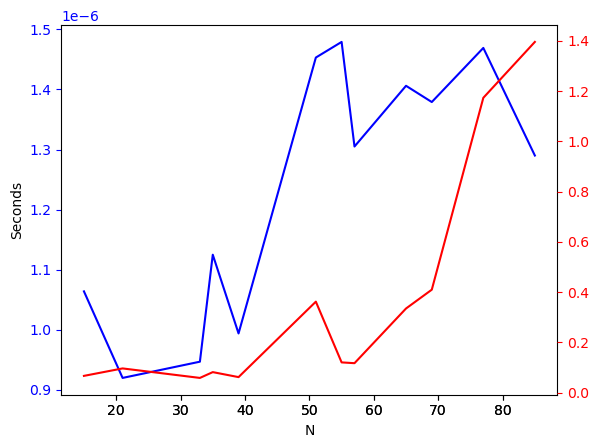

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111, label = "BF")
ax2 = fig.add_subplot(111, label = "Shor", frame_on = False)

ax.plot(xx, BF_avg_timing, "b")
ax.set_ylabel("Seconds")
ax.tick_params(axis = "y", colors = "b")
ax.set_xlabel("N")

ax2.plot(xx, Shor_avg_timing, "r")
ax2.yaxis.tick_right()
ax2.tick_params(axis = "y", colors = "r")

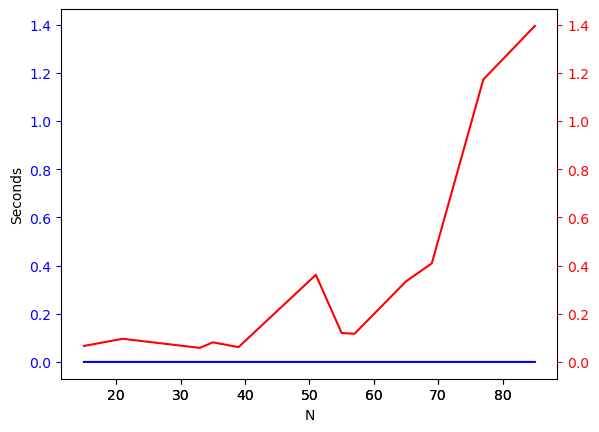

In [23]:
fig = plt.figure()

ax = fig.add_subplot(111, label = "BF")
ax2 = fig.add_subplot(111, label = "Shor", frame_on = False,sharey=ax)

ax.plot(xx, BF_avg_timing, "b")
ax.set_ylabel("Seconds")
ax.tick_params(axis = "y", colors = "b")
ax.set_xlabel("N")

ax2.plot(xx, Shor_avg_timing, "r")
ax2.yaxis.tick_right()
ax2.tick_params(axis = "y", colors = "r")